#**Credit Card Fraud Detection**

#**Objective**

The objective of this project is to develop a machine learning model that can accurately detect fraudulent credit card transactions in real time. The system aims to minimize financial losses and enhance security by identifying anomalies and suspicious activities in transaction data using advanced classification algorithms, while maintaining a low false-positive rate.



#**Domain**

Financial Technology (FinTech)

#*Import Dataset*

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, chi2
from scipy.stats import skew # For skewness calculation


In [3]:
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# --- 1) Exploratory Data Analysis (EDA) ---
print("--- 1) Exploratory Data Analysis (EDA) ---")

# Load the dataset
try:
    df = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/credit_card_transactions.csv")
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading dataset: {e}")
    # Exit if dataset cannot be loaded
    exit()


--- 1) Exploratory Data Analysis (EDA) ---
Dataset loaded successfully.


In [4]:
print("\nDataset Head:")
print(df.head())

print("\nDataset Info:")
df.info()

print("\nMissing values before handling:")
print(df.isnull().sum())


Dataset Head:
  Transaction_ID         Card_Type Merchant_Category  Transaction_Amount  \
0       W963UK57        Mastercard      Utility bill             27214.0   
1       V606KV56  American Express            Retail             83956.0   
2       R531NU70              Visa    Transportation            193280.0   
3       T783GF79             RuPay   Online Shopping            167381.0   
4       K256ZN73             RuPay            Retail             81170.0   

  Transaction_DateTime Location Region  Cardholder_Age Cardholder_Gender  \
0  2020-01-01 09:43:17    Patna   East            23.0            Female   
1  2020-01-03 16:26:13    Surat   West            49.0              Male   
2  2020-01-04 03:40:49    Patna   East             NaN              Male   
3  2020-01-04 14:56:24    Surat   West            52.0            Female   
4  2020-01-04 17:26:47  Lucknow  North            37.0            Female   

   Cardholder_Monthly_Income  Cardholder_Average_Spend  Credit_Limit  \

#**Exploratory Data Analysis(EDA)**



*    *Analyze the distribution of categorical features suchasCard_Type,Merchant_Category,
 Location*,*etc*



--- Categorical Feature Distribution ---

Distribution of Card_Type:
Card_Type
Visa                1979
Mastercard          1540
RuPay                947
American Express     517
Name: count, dtype: int64


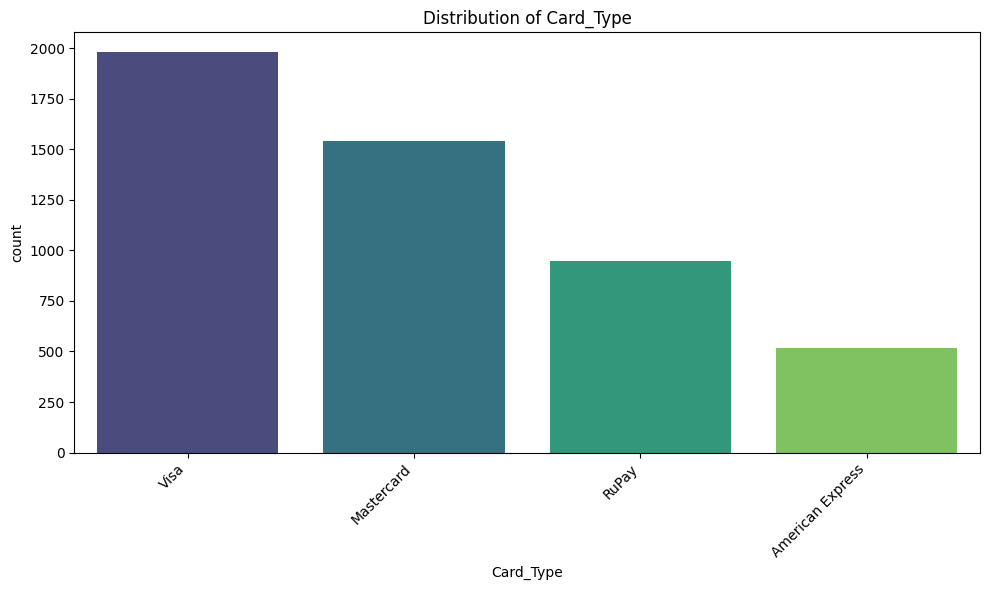


Distribution of Merchant_Category:
Merchant_Category
Online Shopping    1019
Retail              959
Utility bill        521
Education           519
Entertainment       517
Healthcare          496
Dining              481
Transportation      466
Name: count, dtype: int64


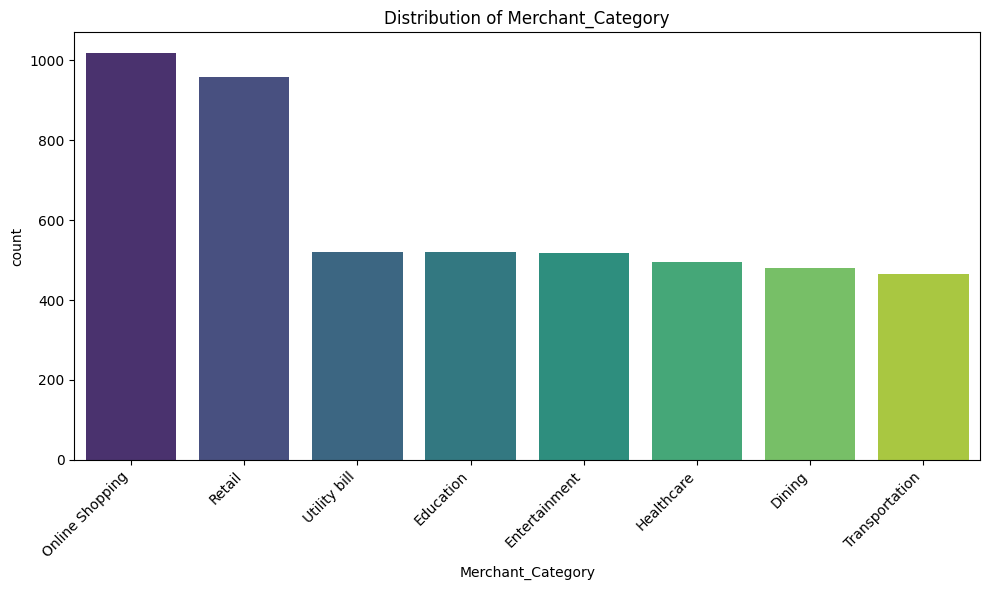


Distribution of Location:
Location
Surat        431
Kochi        415
Bengaluru    410
Hyderabad    395
Mumbai       387
Chennai      387
Lucknow      379
Pune         376
Kolkata      373
Jaipur       373
Patna        371
Delhi        357
Ahmedabad    346
Name: count, dtype: int64


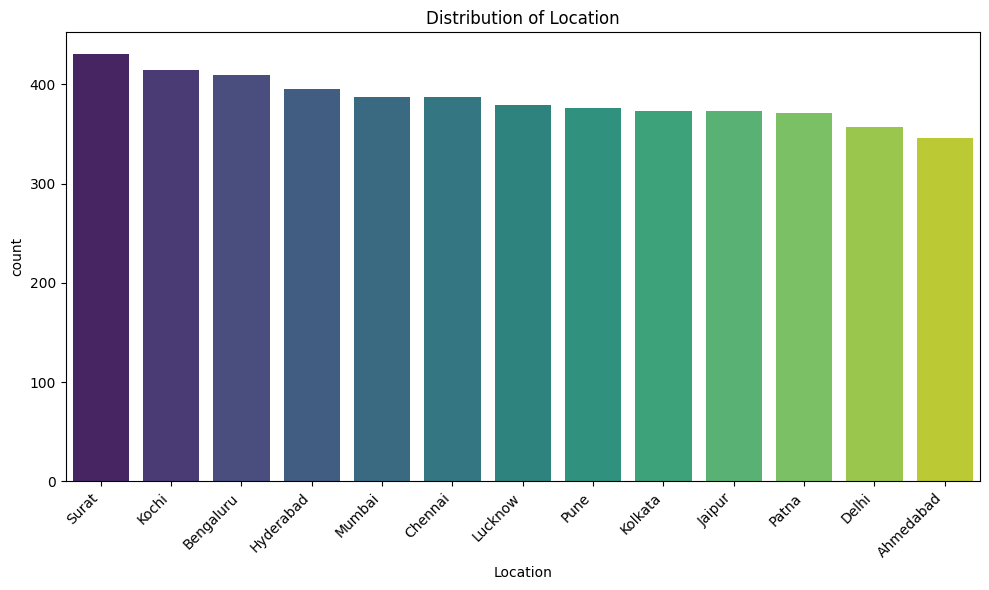

In [5]:
print("\n--- Categorical Feature Distribution ---")
categorical_features = ['Card_Type', 'Merchant_Category', 'Location'] # Assuming these are categorical based on typical datasets
for feature in categorical_features:
    if feature in df.columns:
        print(f"\nDistribution of {feature}:")
        print(df[feature].value_counts())
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=feature, palette='viridis', order=df[feature].value_counts().index)
        plt.title(f'Distribution of {feature}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Warning: '{feature}' not found in dataset columns.")




* *Explore numerical features like Transaction_Amount,Cardholder_Age,
 Cardholder_Monthly_Income,andCardholder_Average_Spend.Use descriptive statisticsto
 understand their central tendency ands pread*




--- Numerical Feature Exploration ---

Descriptive statistics for numerical features:
       Transaction_Amount  Cardholder_Age  Cardholder_Monthly_Income  \
count         4994.000000     4865.000000                4686.000000   
mean         74667.995995       49.106680              137353.817542   
std          43089.045623       18.398524               69471.623020   
min          25008.000000       18.000000               35005.000000   
25%          39742.500000       33.000000               73485.000000   
50%          60922.000000       49.000000              131833.000000   
75%          98373.500000       65.000000              189054.250000   
max         199923.000000       80.000000              299907.000000   

       Cardholder_Average_Spend  
count               4792.000000  
mean               63058.343566  
std                40056.989704  
min                10282.410000  
25%                33336.742500  
50%                49547.945000  
75%                83732.3

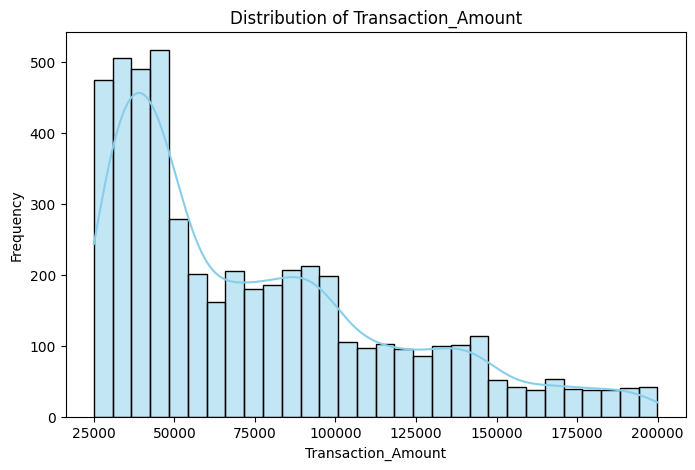

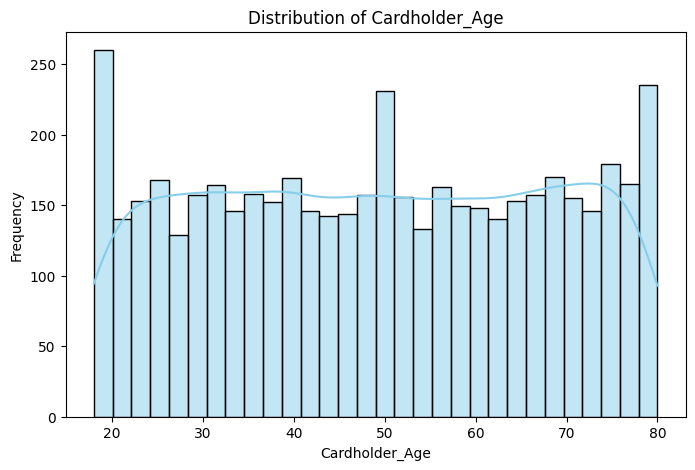

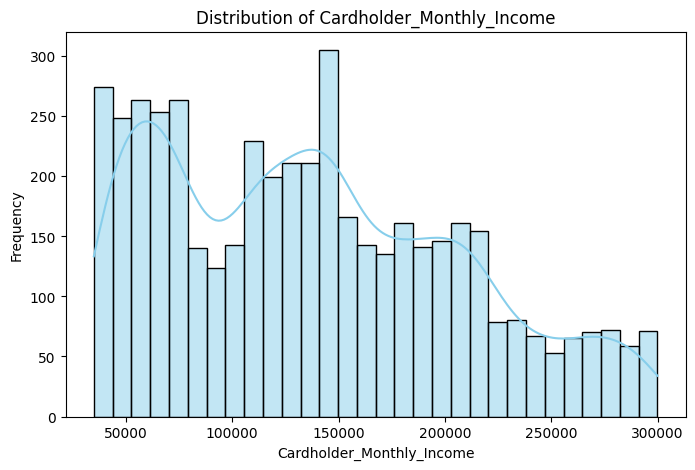

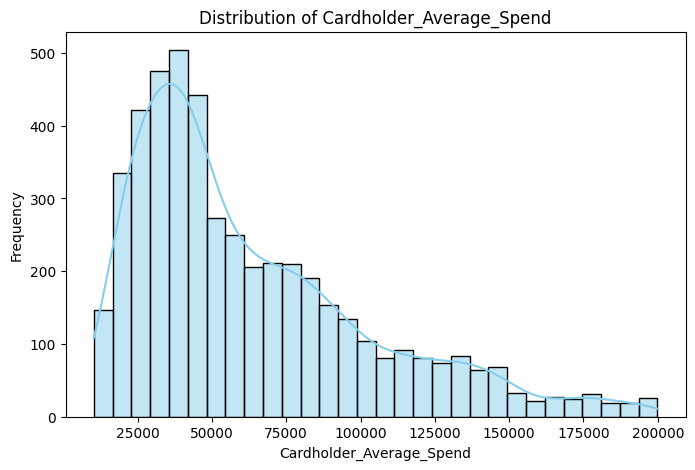

In [6]:
print("\n--- Numerical Feature Exploration ---")
numerical_features = ['Transaction_Amount', 'Cardholder_Age', 'Cardholder_Monthly_Income', 'Cardholder_Average_Spend']
print("\nDescriptive statistics for numerical features:")
print(df[numerical_features].describe())

for feature in numerical_features:
    if feature in df.columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()
    else:
        print(f"Warning: '{feature}' not found in dataset columns.")




*  *Conductbivariateandmultivariateanalysistoidentifypotentialrelationshipsbetweenthe
 featuresaswellaswiththetargetvariable(Is_Fraudulent)*



In [7]:
print("\n--- Bivariate and Multivariate Analysis ---")


--- Bivariate and Multivariate Analysis ---


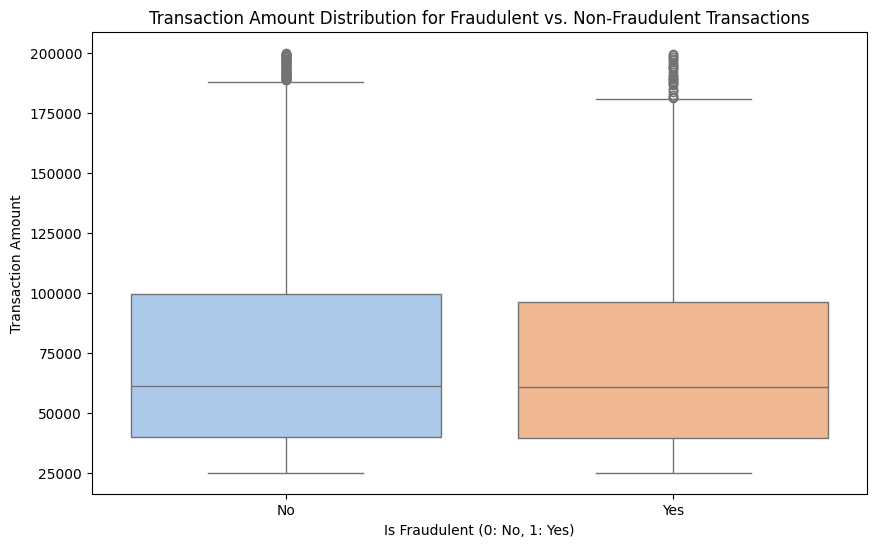

In [9]:
# Transaction Amount vs. Is_Fraudulent
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Is_Fraudulent', y='Transaction_Amount', palette='pastel')
plt.title('Transaction Amount Distribution for Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Is Fraudulent (0: No, 1: Yes)')
plt.ylabel('Transaction Amount')
plt.show()

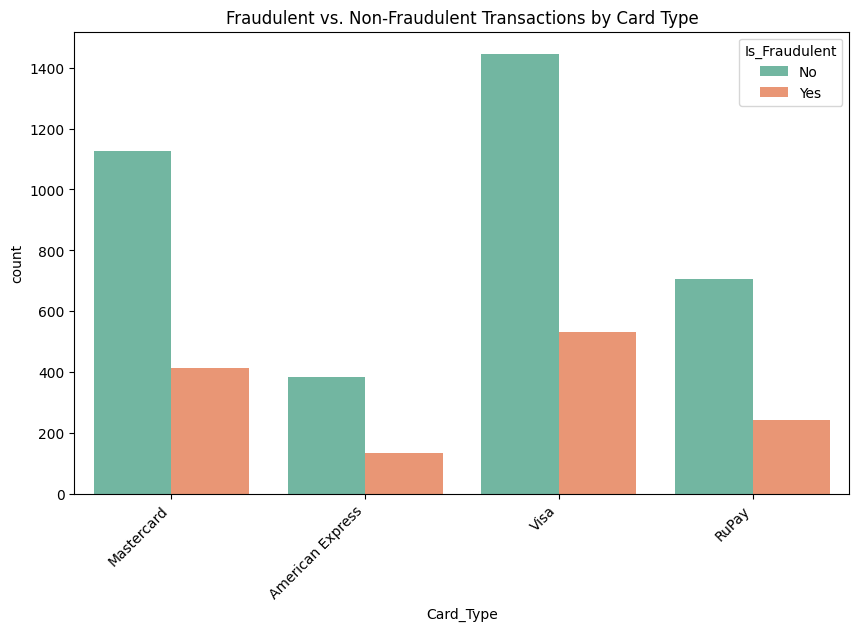

In [10]:
# Card Type vs. Is_Fraudulent
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Card_Type', hue='Is_Fraudulent', palette='Set2')
plt.title('Fraudulent vs. Non-Fraudulent Transactions by Card Type')
plt.xticks(rotation=45, ha='right')
plt.show()

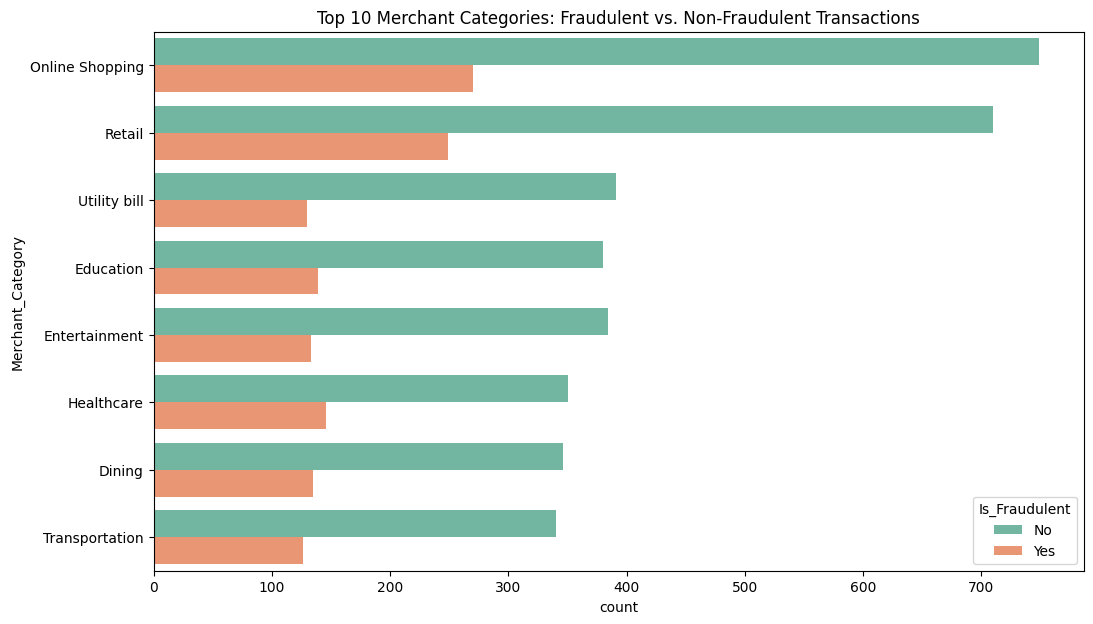

In [11]:
# Merchant Category vs. Is_Fraudulent (showing top N categories for readability)
plt.figure(figsize=(12, 7))
sns.countplot(data=df, y='Merchant_Category', hue='Is_Fraudulent', palette='Set2', order=df['Merchant_Category'].value_counts().index[:10])
plt.title('Top 10 Merchant Categories: Fraudulent vs. Non-Fraudulent Transactions')
plt.show()




*   *Visualize the distribution of transaction amounts for fraudulentvs.non-fraudulent transactions using histograms or boxplots*




--- Transaction Amount Distribution for Fraudulent vs. Non-Fraudulent ---


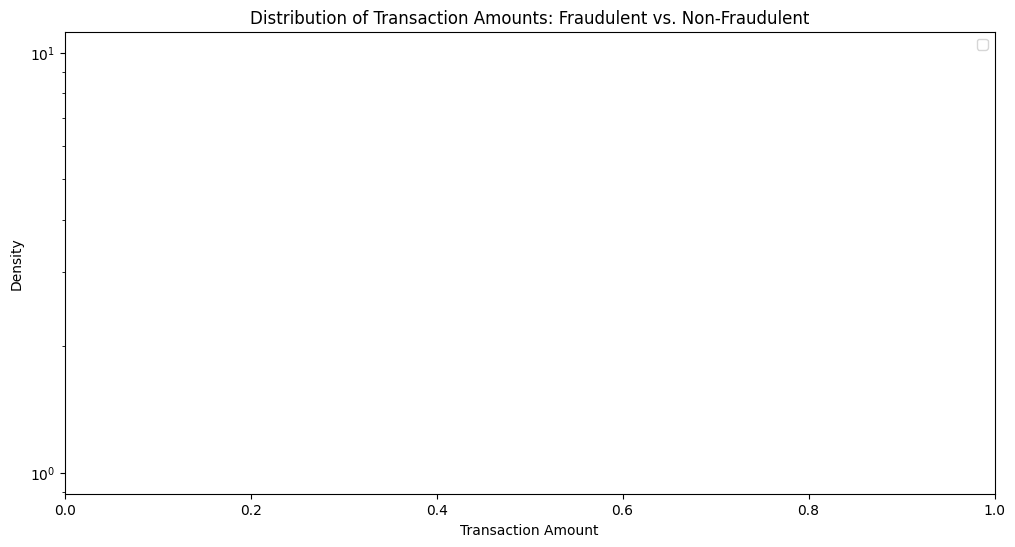

In [12]:
print("\n--- Transaction Amount Distribution for Fraudulent vs. Non-Fraudulent ---")
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Is_Fraudulent'] == 0]['Transaction_Amount'], color='blue', label='Non-Fraudulent', kde=True, stat='density', alpha=0.6, bins=50)
sns.histplot(df[df['Is_Fraudulent'] == 1]['Transaction_Amount'], color='red', label='Fraudulent', kde=True, stat='density', alpha=0.6, bins=50)
plt.title('Distribution of Transaction Amounts: Fraudulent vs. Non-Fraudulent')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.legend()
plt.yscale('log') # Use log scale for y-axis due to imbalance
plt.show()



*   *Investigate whether certain features are more susceptible to fraud*



In [13]:
print("\n--- Features Susceptible to Fraud ---")
# Example: Mean Transaction_Amount for fraudulent vs. non-fraudulent
print(df.groupby('Is_Fraudulent')['Transaction_Amount'].mean())


--- Features Susceptible to Fraud ---
Is_Fraudulent
No     75172.616580
Yes    73273.539563
Name: Transaction_Amount, dtype: float64


#**Data Preprocessing- Data Cleaning**

In [16]:
print("\n--- 2) Data Preprocessing - Data Cleaning ---")
# Separate features (X) and target (y)
X = df.drop('Is_Fraudulent', axis=1)
y = df['Is_Fraudulent']


--- 2) Data Preprocessing - Data Cleaning ---


In [17]:
# Identify numerical and categorical columns again after initial checks
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()




*   *Handle missing values if any, using appropriate techniques such as KNNImputer; mean or
 median imputation for numerical features, and mode imputation for categorical features*



In [18]:
print("\nHandling missing values...")
print("Missing values before imputation:")
print(X.isnull().sum())


Handling missing values...
Missing values before imputation:
Transaction_ID                 0
Card_Type                     17
Merchant_Category             22
Transaction_Amount             6
Transaction_DateTime           0
Location                       0
Region                         0
Cardholder_Age               135
Cardholder_Gender             89
Cardholder_Monthly_Income    314
Cardholder_Average_Spend     208
Credit_Limit                   9
Device_Type                   40
Day_of_Week                    0
dtype: int64


In [19]:
# Apply KNNImputer for numerical features
if len(numerical_cols) > 0:
    knn_imputer = KNNImputer(n_neighbors=5)
    X[numerical_cols] = knn_imputer.fit_transform(X[numerical_cols])


In [20]:
# Apply mode imputation for categorical features
if len(categorical_cols) > 0:
    for col in categorical_cols:
        if X[col].isnull().any():
            X[col].fillna(X[col].mode()[0], inplace=True)

print("\nMissing values after imputation:")
print(X.isnull().sum())




Missing values after imputation:
Transaction_ID               0
Card_Type                    0
Merchant_Category            0
Transaction_Amount           0
Transaction_DateTime         0
Location                     0
Region                       0
Cardholder_Age               0
Cardholder_Gender            0
Cardholder_Monthly_Income    0
Cardholder_Average_Spend     0
Credit_Limit                 0
Device_Type                  0
Day_of_Week                  0
dtype: int64




*  *Check for outliers in numerical features using statistical methods like Z-score or IQR
 (Interquartile Range) and remove them if necessary to ensure data quality*



In [21]:
print("\nChecking and handling outliers (using IQR)...")
# Note: For fraud detection, some outliers might be genuine fraud.
# Removing them might lead to loss of crucial information.
# This step is shown for demonstration, but might be skipped or handled differently in a real-world scenario.
for col in numerical_cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = X[(X[col] < lower_bound) | (X[col] > upper_bound)]
    if not outliers.empty:
        print(f"Found {len(outliers)} outliers in '{col}'.")
        # Option 1: Remove outliers (Use with caution for fraud data)
        # X = X[~((X[col] < lower_bound) | (X[col] > upper_bound))]
        # print(f"Removed outliers in '{col}'. New shape: {X.shape}")
    else:
        print(f"No significant outliers found in '{col}'.")



Checking and handling outliers (using IQR)...
Found 96 outliers in 'Transaction_Amount'.
No significant outliers found in 'Cardholder_Age'.
No significant outliers found in 'Cardholder_Monthly_Income'.
Found 146 outliers in 'Cardholder_Average_Spend'.
No significant outliers found in 'Credit_Limit'.




*  *Assess skewness in numerical features by calculating the skewness score. If any features are
 highly skewed, consider applying transformations such as square root or log transformation
 to improve their distribution before scaling, if needed*



In [22]:
print("\nAssessing skewness and applying transformations...")
for col in numerical_cols:
    skewness_score = skew(X[col].dropna()) # Drop NA for skewness calculation
    print(f"Skewness of '{col}': {skewness_score:.2f}")
    # Threshold for high skewness can vary, e.g., |skewness| > 0.5 or 1
    if abs(skewness_score) > 1: # Common threshold for high skewness
        print(f"'{col}' is highly skewed. Applying log transformation.")
        # Add a small constant to avoid log(0) if feature can have zero values
        X[col] = np.log1p(X[col]) # log1p performs log(1+x)
        print(f"New skewness of '{col}' after log1p: {skew(X[col].dropna()):.2f}")



Assessing skewness and applying transformations...
Skewness of 'Transaction_Amount': 0.97
Skewness of 'Cardholder_Age': -0.01
Skewness of 'Cardholder_Monthly_Income': 0.42
Skewness of 'Cardholder_Average_Spend': 1.14
'Cardholder_Average_Spend' is highly skewed. Applying log transformation.
New skewness of 'Cardholder_Average_Spend' after log1p: 0.01
Skewness of 'Credit_Limit': 0.01


#**Feature Engineering**

In [23]:
print("\n--- 3) Feature Engineering ---")


--- 3) Feature Engineering ---




*   *Identify the categorical features in the dataset*



In [24]:
print(f"Categorical features identified: {categorical_cols}")

Categorical features identified: ['Transaction_ID', 'Card_Type', 'Merchant_Category', 'Transaction_DateTime', 'Location', 'Region', 'Cardholder_Gender', 'Device_Type', 'Day_of_Week']




*   *Encode categorical features to numerical using techniques like one-hot encoding or label
 encoding techniques to prepare the data for machine learning algorithms*



In [25]:
print("\nEncoding categorical features using One-Hot Encoding...")
if len(categorical_cols) > 0:
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    encoded_features = encoder.fit_transform(X[categorical_cols])
    encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
    encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=X.index)


Encoding categorical features using One-Hot Encoding...


#**Feature Selection**

In [27]:
print("\n--- 4) Feature Selection ---")


--- 4) Feature Selection ---




*   *Select relevant features that have the most impact on predicting fraudulent transactions*



In [28]:
# Ensure all columns are numeric for feature selection
X = X.apply(pd.to_numeric, errors='coerce')
# Fill any NaNs that might have been introduced by coercion (e.g., if a column was entirely non-numeric and became NaN)
X.fillna(X.mean(), inplace=True)


In [29]:
# Select features based on correlation with target for numerical
print("\nSelecting features based on correlation with target...")
# Re-align X and y indices if any rows were dropped during outlier removal
X_aligned, y_aligned = X.align(y, join='inner', axis=0) # Use inner join to keep common indices



Selecting features based on correlation with target...


In [32]:
print("\nSelecting features using SelectKBest (chi2)...")
# Ensure all features are non-negative for chi2
X_non_negative = X.copy()
# Smallest value in X (before scaling, can be negative)
min_val = X_non_negative.min().min()
if min_val < 0:
    X_non_negative = X_non_negative + abs(min_val) # Shift to make all values non-negative


Selecting features using SelectKBest (chi2)...


#**Split data into training and testing**

In [35]:
print("\n--- 5) Split data into training and testing ---")


--- 5) Split data into training and testing ---




*    *Divide the dataset into training and testing sets to evaluate the model's performance*


*   *Ensure that both sets maintain the same distribution of fraudulent and non-fraudulent
 transactions to avoid data leakage*





In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")
print("\nTraining set class distribution:")
print(y_train.value_counts(normalize=True))
print("Testing set class distribution:")
print(y_test.value_counts(normalize=True))

Training set size: 3500 samples
Testing set size: 1500 samples

Training set class distribution:
Is_Fraudulent
No     0.733714
Yes    0.266286
Name: proportion, dtype: float64
Testing set class distribution:
Is_Fraudulent
No     0.733333
Yes    0.266667
Name: proportion, dtype: float64


#**Feature Scaling**

In [41]:
print("\n--- 6) Feature Scaling ---")



--- 6) Feature Scaling ---




*   *Scale numerical features to ensure that they have the same magnitude, preventing some
 features from dominating others during model training*
* *Commonscaling techniques include Min-Max scaling or Standardization (Z-score
 normalization)*  



In [46]:
# Identify numerical features for scaling. Assuming all columns except 'Class' are numerical and need scaling.
# If there were categorical features, they would need different handling.
# before scaling numerical ones.
numerical_features = X.columns.tolist() # All features are numerical in this dataset

scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames with original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_features, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_features, index=X_test.index)

print("Features scaled successfully using StandardScaler.")
print("Example of scaled data (first 5 rows of training set):")
print(X_train_scaled.head())

Features scaled successfully using StandardScaler.
Example of scaled data (first 5 rows of training set):
      Transaction_ID  Card_Type  Merchant_Category  Transaction_Amount  \
4949             NaN        NaN                NaN           -0.575738   
1730             NaN        NaN                NaN            0.055227   
832              NaN        NaN                NaN           -0.381138   
3882             NaN        NaN                NaN           -0.461441   
1085             NaN        NaN                NaN           -0.920207   

      Transaction_DateTime  Location  Region  Cardholder_Age  \
4949                   NaN       NaN     NaN        1.403705   
1730                   NaN       NaN     NaN       -0.187648   
832                    NaN       NaN     NaN        1.348830   
3882                   NaN       NaN     NaN       -0.571767   
1085                   NaN       NaN     NaN       -0.077899   

      Cardholder_Gender  Cardholder_Monthly_Income  Cardholder_A

#**Build the Machine Learning Model**

In [53]:
# Define a dictionary of classifiers to be evaluated
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear'),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine (SVM)": SVC(random_state=42, probability=True) # probability=True for f1_score with non-binary output
}

results = {}